   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseValue  
0    -122.23          4.526  
1    -122.22          3.585  
2    -122.24          3.521  
3    -122.25          3.413  
4    -122.25          3.422  
MSE of the model is: 1.40


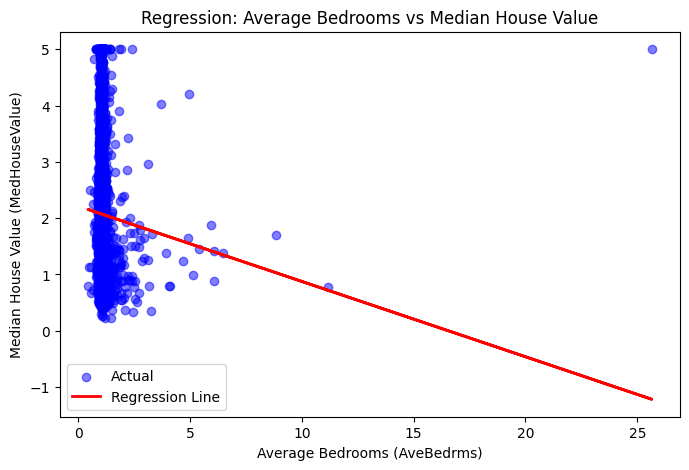

Regression Equation: MedHouseValue = -0.1338 * AveBedrms + 2.2144


In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

# Load dataset
california_housing = fetch_california_housing()

# Convert to DataFrame
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df['MedHouseValue'] = california_housing.target

# Select feature and target
X = df[["AveBedrms"]]       # Independent variable
y = df["MedHouseValue"]      # Dependent variable

print(df.head())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Build and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"MSE of the model is: {mse:.2f}")

# Plot scatter and regression line
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, alpha=0.5, label="Actual", color="blue")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Average Bedrooms (AveBedrms)")
plt.ylabel("Median House Value (MedHouseValue)")
plt.title("Regression: Average Bedrooms vs Median House Value")
plt.legend()
plt.show()

# Print regression equation
print(f"Regression Equation: MedHouseValue = {model.coef_[0]:.4f} * AveBedrms + {model.intercept_:.4f}")


